In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
os.__file__

<IPython.core.display.Javascript object>

'C:\\ProgramData\\Anaconda3\\envs\\pythonProject1\\lib\\os.py'

In [3]:
import os
os.chdir(r'C:\Users\fzh00\Desktop\文件\excel\阿里天池\二手车交易')
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv(r'used_car_train_20200313.csv',sep=' ')
train.head(2)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [5]:
test = pd.read_csv(r"C:\Users\fzh00\Desktop\文件\excel\阿里天池\二手车交易\used_car_testB_20200421.csv",sep=' ')
test.head(2)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542


In [6]:
train['车龄']=pd.to_datetime(train['creatDate'].astype(str),errors='coerce').dt.year-pd.to_datetime(train['regDate'].astype(str),errors='coerce').dt.year
train.head(2)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13.0


In [35]:
train['model'].value_counts()


0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
240.0        2
209.0        2
245.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64

In [101]:
data = train.dropna(axis=0)
data.shape

(129710, 32)

In [102]:
data.head()
data=data.iloc[:,3:]
data.head(2)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4.0


,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
0,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.0
1,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13.0


In [48]:
data.notRepairedDamage.value_counts()

0.0    103451
2       14719
1.0     11540
Name: notRepairedDamage, dtype: int64

In [104]:
data['notRepairedDamage']=pd.to_numeric(data['notRepairedDamage'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129710 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   model              129710 non-null  float64
 1   brand              129710 non-null  int64  
 2   bodyType           129710 non-null  float64
 3   fuelType           129710 non-null  float64
 4   gearbox            129710 non-null  float64
 5   power              129710 non-null  int64  
 6   kilometer          129710 non-null  float64
 7   notRepairedDamage  129710 non-null  float64
 8   regionCode         129710 non-null  int64  
 9   seller             129710 non-null  int64  
 10  offerType          129710 non-null  int64  
 11  creatDate          129710 non-null  int64  
 12  price              129710 non-null  int64  
 13  v_0                129710 non-null  float64
 14  v_1                129710 non-null  float64
 15  v_2                129710 non-null  float64
 16  v_

In [103]:
data['notRepairedDamage']=data['notRepairedDamage'].replace({'-':2})
data.head()

,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
0,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.0
1,40.0,1,2.0,0.0,0.0,0,15.0,2,4366,0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13.0
2,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12.0
3,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20.0
4,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4.0


In [105]:
data.shape

(129710, 29)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129710 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   model              129710 non-null  float64
 1   brand              129710 non-null  int64  
 2   bodyType           129710 non-null  float64
 3   fuelType           129710 non-null  float64
 4   gearbox            129710 non-null  float64
 5   power              129710 non-null  int64  
 6   kilometer          129710 non-null  float64
 7   notRepairedDamage  129710 non-null  float64
 8   regionCode         129710 non-null  int64  
 9   seller             129710 non-null  int64  
 10  offerType          129710 non-null  int64  
 11  creatDate          129710 non-null  int64  
 12  price              129710 non-null  int64  
 13  v_0                129710 non-null  float64
 14  v_1                129710 non-null  float64
 15  v_2                129710 non-null  float64
 16  v_

In [14]:
os.getcwd()

'C:\\Users\\fzh00\\Desktop\\文件\\excel\\阿里天池\\二手车交易'

In [15]:
# 一行代码输出统计分析报告
import pandas_profiling as pp
report = pp.ProfileReport(data)

# 报告输出为html
report.to_file("report_output1114.html")

C:\Users\fzh00\AppData\Local\Temp\ipykernel_9388\230094515.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 36710 (\N{CJK UNIFIED IDEOGRAPH-8F66}) missing from current font.
  plt.savefig(
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  plt.savefig(
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 36710 (\N{CJK UNIFIED IDEOGRAPH-8F66}) missing from current font.
  plt.savefig(
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  plt.savefig(
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 36710 (\N{CJK UNIFIED IDEOGRAPH-8F66}) missing from

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 36710 (\N{CJK UNIFIED IDEOGRAPH-8F66}) missing from current font.
  plt.savefig(
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  plt.savefig(


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [21]:
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

C:\Users\fzh00\AppData\Local\Temp\ipykernel_9388\2418398248.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [106]:
#删除重复值
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [26]:
#查看缺失情况
data.isnull().mean()
data.isnull().sum()

model                0.0
brand                0.0
bodyType             0.0
fuelType             0.0
gearbox              0.0
power                0.0
kilometer            0.0
notRepairedDamage    0.0
regionCode           0.0
seller               0.0
offerType            0.0
creatDate            0.0
price                0.0
v_0                  0.0
v_1                  0.0
v_2                  0.0
v_3                  0.0
v_4                  0.0
v_5                  0.0
v_6                  0.0
v_7                  0.0
v_8                  0.0
v_9                  0.0
v_10                 0.0
v_11                 0.0
v_12                 0.0
v_13                 0.0
v_14                 0.0
车龄                   0.0
dtype: float64

model                0
brand                0
bodyType             0
fuelType             0
gearbox              0
power                0
kilometer            0
notRepairedDamage    0
regionCode           0
seller               0
offerType            0
creatDate            0
price                0
v_0                  0
v_1                  0
v_2                  0
v_3                  0
v_4                  0
v_5                  0
v_6                  0
v_7                  0
v_8                  0
v_9                  0
v_10                 0
v_11                 0
v_12                 0
v_13                 0
v_14                 0
车龄                   0
dtype: int64

<AxesSubplot: >

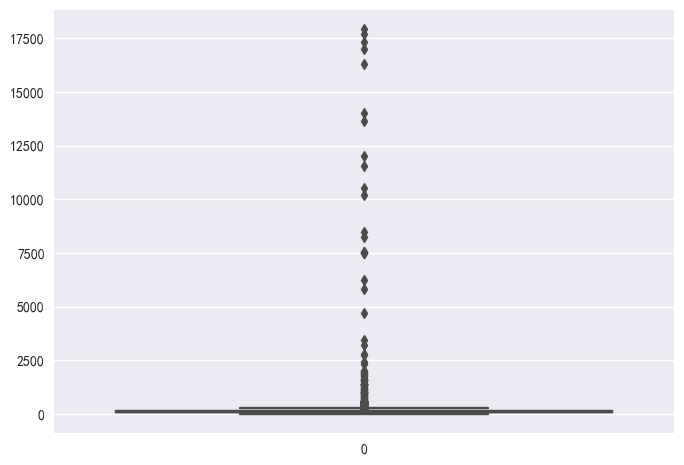

In [29]:
%matplotlib inline
sns.boxplot(data['power'])

In [107]:
#标准化数据(Age)
z = stats.zscore(data['power'])
#寻找异常数据的索引
z[(z>3)|(z<-3)].index
#将异常值使用除异常值之外的数据的均值进行填补
data['power'].drop(index=z[(z>3)|(z<-3)].index,inplace=True)

Int64Index([   221,    534,    919,   4398,   4790,   5179,   5648,   7249,
              7753,   8454,  21333,  22020,  22136,  26603,  28038,  28845,
             30596,  33320,  37097,  39031,  41388,  41623,  45826,  47999,
             49071,  49319,  50245,  51287,  53355,  53392,  56083,  56804,
             57689,  59779,  62506,  64842,  64922,  64985,  68043,  68742,
             70150,  71018,  73199,  74073,  76384,  77692,  77842,  78905,
             79449,  80065,  82207,  82958,  83296,  83310,  85946,  86783,
             87209,  88115,  89114,  90179,  92461,  92677,  92698,  94526,
             95308,  97047,  98733,  99053, 100465, 103402, 103622, 105435,
            106427, 106515, 107700, 111195, 111857, 113849, 117704, 119876,
            121396, 121824, 126190, 126365, 127288, 128271, 128540, 129802,
            129887, 136914, 137833, 138581, 143298, 146245, 148030, 148365,
            149251],
           dtype='int64')

In [44]:
data.shape

(128535, 29)

In [45]:
# 哑变量转换
#edu_class哑变量转换
dummy = pd.get_dummies(data['notRepairedDamage'], prefix='notR', drop_first=True)
dummy.head()

,notR_1.0,notR_2.0
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [47]:
data =data.join(dummy).head()

In [48]:
data.head()

,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,...,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄,notR_1.0,notR_2.0
0,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,...,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.0,0,0
1,40.0,1,2.0,0.0,0.0,0,15.0,2.0,4366,0,...,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13.0,0,1
2,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,...,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12.0,0,0
3,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,...,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20.0,0,0
4,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,...,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4.0,0,0


In [53]:
data.rename(columns={'notR_1.0':'notR_1', 'notR_2.0':'notR_2'},inplace=True)
data.columns

Index(['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'notRepairedDamage', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', '车龄',
       'notR_1', 'notR_2'],
      dtype='object')

,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,...,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄,notR_1,notR_2
0,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,...,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.0,0,0
1,40.0,1,2.0,0.0,0.0,0,15.0,2.0,4366,0,...,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13.0,0,1
2,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,...,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12.0,0,0
3,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,...,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20.0,0,0
4,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,...,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4.0,0,0


In [63]:
formual = 'price~model+brand+bodyType+fuelType+gearbox+power+kilometer+regionCode+seller+offerType+v_0+v_1+v_2+v_3+v_4+v_5+v_6+v_7+v_8+v_9+v_10+v_11+v_12+v_13+v_14+车龄+notR_1+notR_2'
model = ols(formula=formual,data=data)
model=model.fit()
model.summary()

C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packag

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                nan
Time:                        15:32:48   Log-Likelihood:                 120.42
No. Observations:                   5   AIC:                            -230.8
Df Residuals:                       0   BIC:                            -232.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5089        inf         -0        nan         nan         nan
model        -50.2646        inf         -0        nan         nan         nan
brand        271.7795        inf          0        nan         nan         nan
bodyType      39.6045        inf          0        nan         nan         nan
fuelType            0        nan        nan        nan         nan         nan
gearbox      -29.8070        inf         -0        nan         nan         nan
power         28.6439        inf          0        nan         nan         nan
kilometer    105.9602        inf          0        nan         nan         nan
regionCode     1.3224        inf          0        nan         nan         nan
seller              0        nan        nan        nan         nan         nan
offerType           0        nan        nan        nan         nan         nan
v_0          -49.8976        inf         -0        nan         nan         nan
v_1           78.9528        inf          0        nan         nan         nan
v_2           53.8985        inf          0        nan         nan         nan
v_3          -42.5029        inf         -0        nan         nan         nan
v_4          -66.0318        inf         -0        nan         nan         nan
v_5           -0.4245        inf         -0        nan         nan         nan
v_6            1.0621        inf          0        nan         nan         nan
v_7            2.6406        inf          0        nan         nan         nan
v_8            0.2611        inf          0        nan         nan         nan
v_9           -2.3349        inf         -0        nan         nan         nan
v_10         -89.7045        inf         -0        nan         nan         nan
v_11          25.9183        inf          0        nan         nan         nan
v_12          81.4659        inf          0        nan         nan         nan
v_13         -66.0443        inf         -0        nan         nan         nan
v_14         -49.7527        inf         -0        nan         nan         nan
车龄           -63.1119        inf         -0        nan         nan         nan
notR_1              0        nan        nan        nan         nan         nan
notR_2        12.3064        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.436
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.578
Skew:                           0.108   Prob(JB):                        0.749
Kurtosis:                       1.348   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [66]:
model.summary()

C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                nan
Time:                        16:48:37   Log-Likelihood:                 120.42
No. Observations:                   5   AIC:                            -230.8
Df Residuals:                       0   BIC:                            -232.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5089        inf         -0        nan         nan         nan
model        -50.2646        inf         -0        nan         nan         nan
brand        271.7795        inf          0        nan         nan         nan
bodyType      39.6045        inf          0        nan         nan         nan
fuelType            0        nan        nan        nan         nan         nan
gearbox      -29.8070        inf         -0        nan         nan         nan
power         28.6439        inf          0        nan         nan         nan
kilometer    105.9602        inf          0        nan         nan         nan
regionCode     1.3224        inf          0        nan         nan         nan
seller              0        nan        nan        nan         nan         nan
offerType           0        nan        nan        nan         nan         nan
v_0          -49.8976        inf         -0        nan         nan         nan
v_1           78.9528        inf          0        nan         nan         nan
v_2           53.8985        inf          0        nan         nan         nan
v_3          -42.5029        inf         -0        nan         nan         nan
v_4          -66.0318        inf         -0        nan         nan         nan
v_5           -0.4245        inf         -0        nan         nan         nan
v_6            1.0621        inf          0        nan         nan         nan
v_7            2.6406        inf          0        nan         nan         nan
v_8            0.2611        inf          0        nan         nan         nan
v_9           -2.3349        inf         -0        nan         nan         nan
v_10         -89.7045        inf         -0        nan         nan         nan
v_11          25.9183        inf          0        nan         nan         nan
v_12          81.4659        inf          0        nan         nan         nan
v_13         -66.0443        inf         -0        nan         nan         nan
v_14         -49.7527        inf         -0        nan         nan         nan
车龄           -63.1119        inf         -0        nan         nan         nan
notR_1              0        nan        nan        nan         nan         nan
notR_2        12.3064        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.436
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.578
Skew:                           0.108   Prob(JB):                        0.749
Kurtosis:                       1.348   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

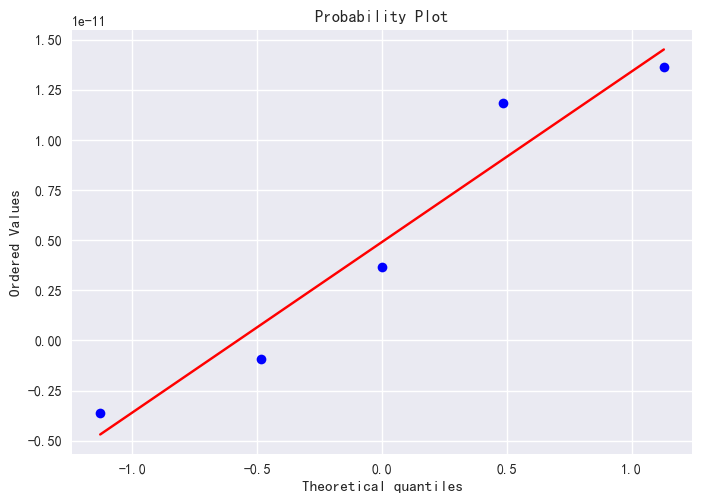

In [67]:
res  = stats.probplot(model.resid,plot=plt)

In [64]:
# vif时，需手动添加截距项 ,计算方差膨胀因子
#手动去除因变量
#手动添加截距项
data_vif = data.drop(['price'], axis=1)
data_vif['Inter'] = 1  #相当于添加了截距项
data_vif.drop(['notR_1', 'notR_2'], axis=1, inplace=True)
#计算每个变量的VIF值 1-3正常，3-10岭回归处理，>10建议删除
for i in range(0,data_vif.shape[1]):
    print(data_vif.columns[i], vif(data_vif,i))

model inf
brand inf
bodyType inf
fuelType nan
gearbox inf
power inf
kilometer inf
notRepairedDamage inf
regionCode inf
seller nan
offerType nan
creatDate inf
v_0 inf
v_1 inf
v_2 inf
v_3 inf
v_4 inf
v_5 inf
v_6 inf
v_7 inf
v_8 inf
v_9 inf
v_10 inf
v_11 inf
v_12 inf
v_13 inf
v_14 inf
车龄 inf
Inter 0.0


C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


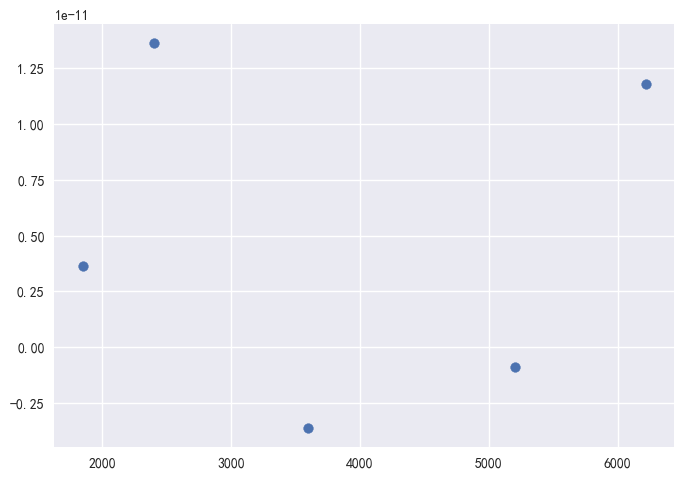

In [65]:
plt.scatter(model.predict(data),model.resid)

In [100]:
data.shape

(5, 31)

In [108]:
col = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power','车龄','regionCode'
]
from sklearn import preprocessing

x = preprocessing.scale(data[col])
y = data['price']


In [109]:
st_data = pd.DataFrame(x).join(y)
st_data.head()

,0,1,2,3,4,5,6,7,price
0,-0.366790,-0.258328,-0.455482,-0.694446,-0.548996,-0.395655,-0.051653,-0.816553,1850.0
1,-0.166479,-0.892277,0.109786,-0.694446,-0.548996,-0.757681,0.134969,0.944797,3600.0
2,1.335851,0.882780,-0.455482,-0.694446,-0.548996,0.225824,-0.051653,0.117174,6222.0
3,1.215665,0.248831,-1.020750,-0.694446,1.821508,0.406838,1.441323,-1.141236,2400.0
4,1.235696,-0.385118,-0.455482,-0.694446,-0.548996,-0.347384,-1.544630,2.330003,5200.0


In [110]:
st_data=st_data.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:
                        'g',7:'h'})

In [111]:
st_data.shape

(128535, 9)

In [113]:
formula11 = 'price~a+b+c+d+e+f+g+h'
model11 = ols(formula=formula11,data=st_data)
model11=model11.fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.664
Date:                Tue, 25 Apr 2023   Prob (F-statistic):              0.102
Time:                        17:24:38   Log-Likelihood:            -1.1436e+06
No. Observations:              110271   AIC:                         2.287e+06
Df Residuals:                  110262   BIC:                         2.287e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6390.2522     23.253    274.810      0.000    6344.676    6435.828
a            -16.0258     25.721     -0.623      0.533     -66.439      34.387
b            -24.2357     25.212     -0.961      0.336     -73.651      25.180
c              7.7199     24.157      0.320      0.749     -39.627      55.067
d             25.0371     24.672      1.015      0.310     -23.320      73.394
e            -21.5522     24.136     -0.893      0.372     -68.857      25.753
f             70.8079     24.944      2.839      0.005      21.918     119.698
g             23.8527     24.550      0.972      0.331     -24.264      71.970
h             23.9449     23.270      1.029      0.303     -21.664      69.554
==============================================================================
Omnibus:                    76880.457   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1468995.030
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      19.729   Cond. No.                         1.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressio

In [63]:
formual2 = 'price~model+brand+bodyType+fuelType+gearbox+power+kilometer+regionCode+offerType+v_0+v_1+v_2+v_3+v_4+v_5+v_6+v_7+v_8+v_9+v_10+v_11+v_12+v_13+v_14+车龄'
model2 = ols(formula=formual2,data=data)
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 1.316e+04
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:54:41   Log-Likelihood:            -1.2651e+06
No. Observations:              129710   AIC:                         2.530e+06
Df Residuals:                  129685   BIC:                         2.531e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.748e+09   1.52e+09     -5.113      0.000   -1.07e+10   -4.78e+09
model         10.0548      0.335     30.010      0.000       9.398      10.712
brand        -17.6591      1.810     -9.756      0.000     -21.207     -14.111
bodyType     210.4157      8.595     24.481      0.000     193.569     227.262
fuelType    -158.3641     24.012     -6.595      0.000    -205.427    -111.301
gearbox     1560.5635     30.339     51.438      0.000    1501.100    1620.027
power          2.2611      0.073     30.913      0.000       2.118       2.404
kilometer   -323.1450      3.795    -85.141      0.000    -330.584    -315.706
regionCode     0.0586      0.007      8.942      0.000       0.046       0.071
offerType     -0.0751      0.014     -5.250      0.000      -0.103      -0.047
v_0         1.767e+08   3.46e+07      5.110      0.000    1.09e+08    2.44e+08
v_1         4.362e+09   8.31e+08      5.247      0.000    2.73e+09    5.99e+09
v_2         1.645e+09   3.09e+08      5.326      0.000    1.04e+09    2.25e+09
v_3        -9.541e+07   1.72e+07     -5.559      0.000   -1.29e+08   -6.18e+07
v_4         1.314e+06   2.07e+05      6.358      0.000    9.09e+05    1.72e+06
v_5         1.348e+07   1.98e+06      6.811      0.000     9.6e+06    1.74e+07
v_6         5.003e+06   1.51e+05     33.089      0.000    4.71e+06     5.3e+06
v_7         2.384e+06   3.42e+05      6.962      0.000    1.71e+06    3.06e+06
v_8         4.382e+06   5.27e+05      8.312      0.000    3.35e+06    5.42e+06
v_9         3.847e+06   4.97e+05      7.740      0.000    2.87e+06    4.82e+06
v_10        3.628e+09   6.93e+08      5.239      0.000    2.27e+09    4.99e+09
v_11       -2.875e+09   5.44e+08     -5.281      0.000   -3.94e+09   -1.81e+09
v_12       -5.877e+08   1.09e+08     -5.399      0.000   -8.01e+08   -3.74e+08
v_13       -3.034e+06   4.87e+05     -6.231      0.000   -3.99e+06   -2.08e+06
v_14        3.856e+04   5659.602      6.813      0.000    2.75e+04    4.97e+04
车龄            82.5520      6.043     13.662      0.000      70.709      94.395
==============================================================================
Omnibus:                   110250.086   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7598156.577
Skew:                           3.716   Prob(JB):                         0.00
Kurtosis:                      39.751   Cond. No.                     1.24e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.67e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129710 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   model              129710 non-null  float64
 1   brand              129710 non-null  int64  
 2   bodyType           129710 non-null  float64
 3   fuelType           129710 non-null  float64
 4   gearbox            129710 non-null  float64
 5   power              129710 non-null  int64  
 6   kilometer          129710 non-null  float64
 7   notRepairedDamage  129710 non-null  float64
 8   regionCode         129710 non-null  int64  
 9   seller             129710 non-null  int64  
 10  offerType          129710 non-null  int64  
 11  creatDate          129710 non-null  int64  
 12  price              129710 non-null  int64  
 13  v_0                129710 non-null  float64
 14  v_1                129710 non-null  float64
 15  v_2                129710 non-null  float64
 16  v_

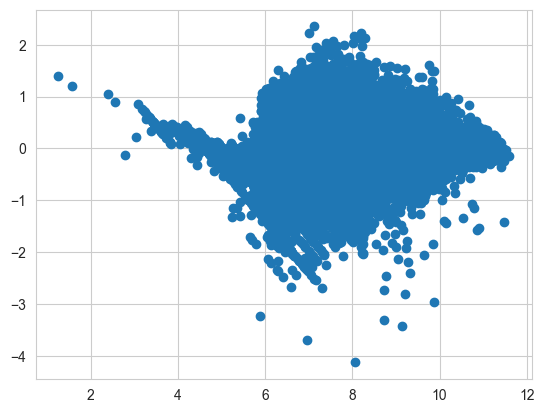

In [70]:
import matplotlib.pyplot as plt
plt.scatter(model3.predict(data), model3.resid)

<IPython.core.display.Javascript object>

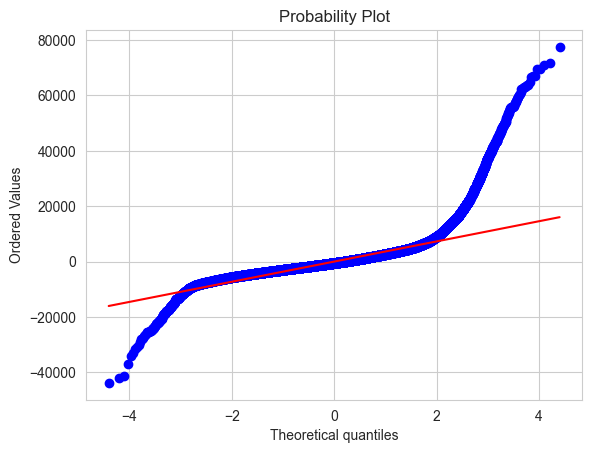

In [67]:
# 正态性
res = stats.probplot(model2.resid, plot=plt)

In [68]:
formual3 = 'np.log(price+1)~model+brand+bodyType+fuelType+gearbox+power+kilometer+regionCode+offerType+v_0+v_1+v_2+v_3+v_4+v_5+v_6+v_7+v_8+v_9+v_10+v_11+v_12+v_13+v_14+车龄'
model3 = ols(formula=formual3,data=data)
model3=model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(price + 1)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 7.360e+04
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:13:50   Log-Likelihood:                -29647.
No. Observations:              129710   AIC:                         5.934e+04
Df Residuals:                  129685   BIC:                         5.959e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.582e+05   1.11e+05      8.659      0.000    7.41e+05    1.18e+06
model          0.0002   2.45e-05     10.035      0.000       0.000       0.000
brand         -0.0014      0.000    -10.514      0.000      -0.002      -0.001
bodyType      -0.0002      0.001     -0.337      0.736      -0.001       0.001
fuelType      -0.0051      0.002     -2.927      0.003      -0.009      -0.002
gearbox        0.0419      0.002     18.921      0.000       0.038       0.046
power        8.29e-05   5.34e-06     15.522      0.000    7.24e-05    9.34e-05
kilometer     -0.0098      0.000    -35.217      0.000      -0.010      -0.009
regionCode -2.631e-06   4.78e-07     -5.500      0.000   -3.57e-06   -1.69e-06
offerType   8.791e-06   1.04e-06      8.419      0.000    6.74e-06    1.08e-05
v_0        -2.186e+04   2524.759     -8.657      0.000   -2.68e+04   -1.69e+04
v_1        -5.125e+05   6.07e+04     -8.444      0.000   -6.32e+05   -3.94e+05
v_2        -1.876e+05   2.26e+04     -8.317      0.000   -2.32e+05   -1.43e+05
v_3         9938.3601   1253.368      7.929      0.000    7481.780    1.24e+04
v_4          -94.4242     15.092     -6.256      0.000    -124.005     -64.844
v_5          145.9931    144.519      1.010      0.312    -137.261     429.247
v_6         -209.3939     11.040    -18.967      0.000    -231.032    -187.756
v_7           24.8450     25.008      0.993      0.320     -24.170      73.860
v_8           -2.5100     38.495     -0.065      0.948     -77.960      72.940
v_9           44.3842     36.292      1.223      0.221     -26.748     115.516
v_10       -4.277e+05   5.06e+04     -8.458      0.000   -5.27e+05   -3.29e+05
v_11        3.336e+05   3.98e+04      8.391      0.000    2.56e+05    4.12e+05
v_12        6.516e+04   7949.254      8.197      0.000    4.96e+04    8.07e+04
v_13         236.3311     35.550      6.648      0.000     166.654     306.008
v_14          -2.0623      0.413     -4.990      0.000      -2.872      -1.252
车龄             0.0051      0.000     11.539      0.000       0.004       0.006
==============================================================================
Omnibus:                    23888.423   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           289029.838
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                      10.235   Cond. No.                     1.24e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.67e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<IPython.core.display.Javascript object>

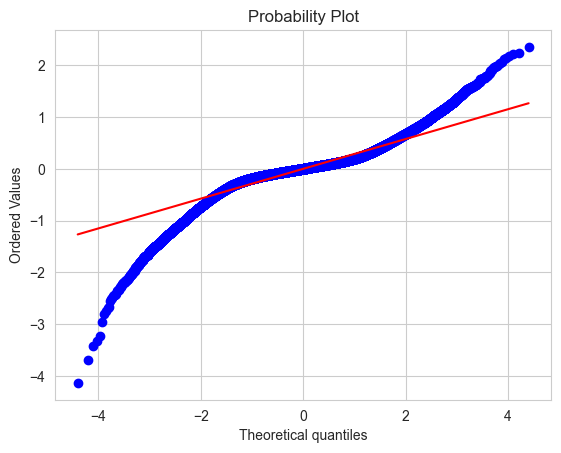

In [69]:
# 正态性
res = stats.probplot(model3.resid, plot=plt)